# How will the theories behind Sabremetrics change the way MLB teams spend money?

In 2003, Michael Lewis published “MoneyBall: The Art of Winning an Unfair Game”. It popularized the newly developed statistical methods in baseball known as “Sabremetrics’.  

Sabremetrics focuses on finding heretofore unrecognized and undervalued skills which directly correlate to winning games.  Those skills being previously undervalued allowed teams to win more games by spending salary money more effectively.  In most general terms, Sabremetrics suggests a switch from relying on paying for hitting to paying for other skills, e.g. the ability to get on base, or fielding.  Since these other skills were not previously recognized as important they would have been worth less money and received less recognition in terms of annual awards.

## How will the validity of Sabremetrics be ascertained?

### Hypotheses

1. Overall performance awards will show a changed recognition of fielding position importance.
2. Different positions will be receiving greater salaries.
3. Teams performance (based on wins) will come at a lower price.


## Approach

### Data

#### Baseball Data

Baseball data is obtained from: https://data.world/dave/lahman-sabremetrics-dataset

1. awardsplayers – This dataset consists of 6078 records detailing which player won one of the up to 27 different awards that have been recognized since 1877.    Awards specifically focused on hitting and/or pitching will be eliminated; as will awards with criteria from outside of the stadium (e.g. charitable endeavors or humanitarian service).  These awards will be used:

        - Baseball Magazine All-Star
        - Most Valuable Player
        - The Sporting News All-Star
        - The Sporting News Guide MVP
        - The Sporting News Major League Player of the Year
        - Rookie of the Year
        - The Sporting News Player of the Year'  				
        - World Series MVP
        - NLCS MVP
        - ALCS MVP
        

2. MLB Salaries – This dataset contains 22,836 records of: 



       Contracts for multiple years are compressed and will need to be extracted for each year to appear.

3. MLB Team Data – contains 28,05 records of team dating from 1904.  The 49 columns have been reduced here to show the pertinent uses for this study:



#### Inflation Data
Inflation data (in order to more accurately compare salaries over a period of years) is obtained from the OECD (Organization for Economic Co-operation and Development) at: https://data.oecd.org/price/inflation-cpi.htm


## Hypotheses

1. Previously undervalued positions will receive a larger portion of a team’s payroll.
2. Teams will win league leading numbers of games by spending less money.
3. Different fielding positions will receive higher salaries.


## Rollout
1. Establish a baseline for comparison by looking at ten years of prior MLB data, i.e. the ten years prior to the publication of Moneyball.
    - Which fielding positions were paid the highest
    - Which fielding positions received the most annual awards
    - Did the winningest teams also have the highest payrolls, and the opposite
2. Gather Data
    - Collect future salary data by position.
    - Collect future award data by position.
    - Analyze future payrolls for the best and worst teams.
3. Compare pre-Moneyball data with post-Moneyball data

New statistical measurements of player performance were developed  to more precisely.

Will the order of salaries by position change?




In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 10 17:12:00 2019

Generate visuals to show the past relationships between:
    - fielding positions and salaries
    - performance awards by position
    - Efectiveness of payrolls and wins/season.
    
@author: jack sonntag
"""
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

plt.rcParams["figure.figsize"] = [6,4 ] # enlarge plot size

colors = ['r','y','g','b','c','k','m']   #plotting features
positions= ['1B','2B','3B','SS','C','OF']
markers=['1','2','3','s','^','o']

To account for inflation over ten years a single factor was used to adjust that year's data to the last year, 2003.

In [8]:
#Inflation adjustments for year until 2003
i_tbl  = {'1993':.273, '1994': .242, '1995': .207, '1996': .173, '1997': .146, \
           '1998': .129, '1999': .104, '2000': .069, '2001': .04, '2002': .23, \
           '2003': 0}

Many of the annual awards given to MLB players are based on hitting, pitching and/or character traits exhibited outside of the stadium.  Those were not used.  The list below account for fielding in varying degrees.

In [9]:
use_these_awards = ['Baseball Magazine All-Star', 
'Most Valuable Player', 
'TSN All-Star', 
'TSN Guide MVP', 
'TSN Major League Player of the Year', 
'TSN Player of the Year', 
'Rookie of the Year', 
'World Series MVP', 
'NLCS MVP', 
'ALCS MVP', 
]

Determine the importance given to specific positions by comparing salaries on a position basis for all players in the ten year period preceding Moneyball

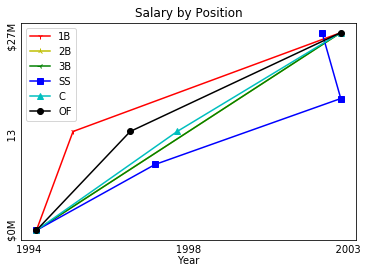

In [10]:

#   SALARIES BY POSITION

file="MLB salaries.csv"
df = pd.read_csv(file)

end_yr = 2004 # exclusive end year
start_yr = end_yr-11  # set start years 10 prior to 2003

# reduce data to the desired time frame
df = df.loc[ (df['year'] < end_yr)]
df = df.loc[ (df['year'] > start_yr)]

df['adj_sal'] = 0  # add column to contain that year's salary adjusted for inflation.

#apply an inflation to each salary to equalize for 2003
for index, row in df.iterrows():
    year = row['year']
    rate = i_tbl[str(year)]
    old_sal = row['salary']
    old_sal = old_sal.replace("$","").replace(",","")
    df.loc[index, 'adj_sal'] = int( int(old_sal) * (1+rate))

#gather data to format the x & y axis'
hi_year = int(df['year'].max())
lo_year = int(df['year'].min())
hi_sal = int(df['adj_sal'].max()/1000000)
lo_sal = int(df['adj_sal'].min()/1000000)
    
    
    # create data and plots for the six feilding positions defined in the positions[]
i=0
for pos in positions:
    frame_name = "df_" + pos
    keyfld = positions[i]
    frame_name = df.loc[df['pos'] == keyfld]
    frame_name['adj_sal'] = frame_name['adj_sal'].round(-7)
    frame_name.sort_values('adj_sal', inplace=True)
    frame_name = frame_name.groupby('adj_sal', \
                as_index=False).aggregate('mean').reindex(columns=frame_name.columns)
    x=frame_name['year']
    x=minmax_scale(x)
    y=frame_name['adj_sal']
    y=minmax_scale(y)
    hue=colors[i]
    plt.plot(x,y,color=hue,label=positions[i],marker=markers[i],zorder = i*3)
    i=i+1
    
#format the plot
plt.xticks([])  #negate old ticks & build new x,y labels & title
plt.yticks([])      
plt.title("Salary by Position")
yspaces = "                         "
ylab =   "\$" + str(lo_sal) +"M" + yspaces + \
        str(int((lo_sal+hi_sal)/2)) + yspaces + "\$"+str(hi_sal) + "M"
plt.ylabel(ylab)
xspaces = "                                           "
xlab = str(lo_year) + xspaces + str(int((lo_year+hi_year)/2)) \
        + xspaces + str(hi_year) + "\nYear"
plt.xlabel(xlab)
plt.legend()    
plt.show()


The 2B (yellow) data is almost entirely identical to 3B (green), and barely visible.  1B is the highest paid position until 2003 when SS jumps up to be equal.  The plotting of future data will show a change, or not, to reflect Sabremetrics new understanding of what skills are now more responsible for winning games.

Which positions have won the most fielding orientated awards in 1994 - 2003?

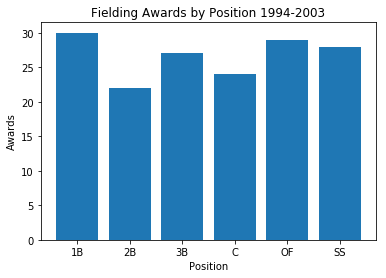

In [11]:

#AWARDS BY POSITION

fn = 'awardsplayers.csv'
df = pd.read_csv(fn)
df = df[df['awardid'].isin(use_these_awards)]
df = df.loc[ (df['year'] < 2004)]
df = df.loc[ (df['year'] > 1993)]

df = df[df.position.isin(positions)]
x=df.groupby(['position']).agg(['count','nunique'])
y=x[('awardid','count')]
x= y.index.tolist()
y['OF'] = y['OF']/3  #divide by 3 since there are 3 OF positions
plt.ylabel("Awards")
plt.xlabel("Position")
plt.title("Fielding Awards by Position 1994-2003")
plt.bar(x,y)
plt.show()





1B, OF (outfield) and SS (short stop) are fairly close.  Excellent hitters are often 1B men or outfielders, so awards which consider both batting and fielding affect the comparison.

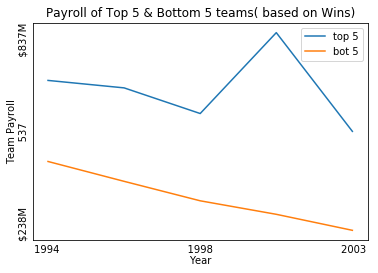

In [12]:
# SALARY BY TEAM

file="MLB Team Data.csv"
df = pd.read_csv(file)

end_yr = 2004
start_yr = end_yr-11

df = df.loc[ (df['year'] > start_yr)]
df = df.loc[ (df['year'] < end_yr)]    

df =  df.groupby('team').sum()
df.sort_values("wins", ascending=False, inplace=True)
top_5 = list((df.head(5).index.values) )
bot_5 = list((df.tail(5).index.values))
all_list = top_5 + bot_5

#print(all_list)
file="MLB salaries.csv"
df = pd.read_csv(file)
end_yr = 2004
start_yr = end_yr-11
df = df.loc[ (df['year'] < end_yr)]
df = df.loc[ (df['year'] > start_yr)]
#print (df['team'].nunique())

df = df.loc[df['team'].isin(all_list)]
#print (df['team'].nunique())

df['salary'] = df['salary'].str.replace(',', '')
df['salary'] = df['salary'].str.replace('$', '')
df['salary'] = df['salary'].astype(int)
df=  df.groupby('team').sum()

hi_sal = int(df['salary'].max()/1000000)
lo_sal = int(df['salary'].min()/1000000)

top_df = df.loc[df.index.isin(top_5)]
bot_df = df.loc[df.index.isin(bot_5)]
top_df['team'] = top_5
bot_df ['team'] = bot_5

plt.xticks([])
plt.yticks([])
plt.ylabel("Salary")
plt.title("Payroll of Top 5 & Bottom 5 teams( based on Wins)")

spaces = "                     "          
ylab =  "Team Payroll\n" + "\$"+str(lo_sal)+"M" + spaces + \
        str(int((lo_sal+hi_sal)/2)) + spaces + "$"+str(hi_sal)+"M"
plt.ylabel(ylab)

height = top_df['salary']
bars = top_df['team']
y_pos = np.arange(len(bars))
plt.plot(y_pos, height, label='top 5')

height = bot_df['salary']
bars = bot_df['team']
y_pos = np.arange(len(bars))
plt.plot(y_pos, height, label='bot 5')
spaces = "                                         "
xlabel = str(start_yr+1) + spaces+ str(int((start_yr+end_yr)/2)) + spaces + \
         str(end_yr-1) +"\nYear"
plt.xlabel(xlabel)
plt.legend()  
plt.show()


The pre-Moneyball strategy of buying a winning team is clearly evident.  Future data will reflect whether Sabremetric's theories are accurate.